<a href="https://colab.research.google.com/github/IvlevaAnna1/Hometasks/blob/main/Hometask_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#загружаем необходимые библиотеки
import pickle
import pandas as pd
import numpy as np
import plotly.express as px
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
%matplotlib inline

In [2]:
df_nashdomrf_new = pd.read_excel('/content/drive/MyDrive/df_nashdomrf_xlsx.xlsx')

In [9]:
df_nashdomrf_new

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13383,39024,28105,72,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13398,37165,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13391,37219,28101,72,"г Тюмень, ул Профсоюзная, д. 56",3,12,44,2023-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11709,56129,136843,794938,32,поселок Свень,9,9,103,2026-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11710,56132,136846,794938,32,поселок Свень,9,9,103,2030-12-31,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11711,56131,136845,794938,32,поселок Свень,9,9,103,2029-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11712,56130,136844,794938,32,поселок Свень,9,9,110,2027-12-31,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_nashdomrf_new.shape

(11714, 110)

In [10]:
#получим список всех колонок датасета
df_nashdomrf_new.columns.tolist()

['id',
 'hobjId',
 'pdId',
 'region',
 'address',
 'floorMin',
 'floorMax',
 'objElemLivingCnt',
 'objReady100PercDt',
 'wallMaterialShortDesc',
 'objLkFinishTypeDesc',
 'objLkFreePlanDesc',
 'objElemParkingCnt',
 'objSquareLiving',
 'rpdNum',
 'rpdPdfLink',
 'rpdIssueDttm',
 'objLkLatitude',
 'objLkLongitude',
 'objCompensFundFlg',
 'objProblemFlg',
 'objLkClassDesc',
 'loadDttm',
 'photoRenderDTO',
 'objGuarantyEscrowFlg',
 'objectType',
 'miniUrl',
 'residentialBuildings',
 'newBuildingId',
 'objFloorCnt',
 'objFlatCnt',
 'objFlatSq',
 'objNonlivElemCnt',
 'objStatus',
 'isAvailableWantLiveHere',
 'objTransferPlanDt',
 'objInfrstrBicycleLaneFlg',
 'objInfrstrPlaygrndCnt',
 'objInfrstrSportGroundCnt',
 'objInfrstrTrashAreaCnt',
 'objInfrstrObjPrkngCnt',
 'objInfrstrNotObjPrkngCnt',
 'objInfrstrRampFlg',
 'objInfrstrCurbLoweringFlg',
 'objElevatorWheelchairCnt',
 'objElevatorPassengerCnt',
 'objElevatorCargoCnt',
 'objElevatorCargoPassengerCnt',
 'soldOutPerc',
 'objPriceAvg',
 'gener

In [18]:
#первые 5 строк датафрейма
df_nashdomrf_new.sample(3)

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.developerGroupName,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg,objLivCeilingHeight,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,nameObj,transportDistIndex,transportDistIndexValue,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
8429,55232,135949,778783,25,"город Владивосток, ул Двенадцатая, д. 8, вл. дом",1,1,0,2025-09-30,Другое,Другое,Есть,1,0.0,25-000711,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,06-12-2023 02:32,43.2284,131.9799,0,0,Бизнес,16-12-2023 01:38,"[{'objId': 55232, 'pdId': 778783, 'rpdId': 798...",1,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,0,135949,1,0,0.0,0,0,True,31-03-2026 12:00,0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0,NaN,NaN,"ООО ""ЮЖНАЯ ДОЛИНА"" (ИНН: 2536278210)",1.0,[],True,NaN,0,Не нормируется,4.0,14433,СЗ СНЕГИРИ,СЗ СНЕГИРИ,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК СНЕГИРИ,0,45,0,Приморский край,+7 (914) 335-87-30,snegiri25.ru/,rus9538@bk.ru,2543155723,1212500004903,254301001,"Приморский край, город Владивосток, улица Русс...","Приморский край, город Владивосток, улица Русс...",798917,0,25.0,Харченко Михаил Михайлович,Aura Development,4,Общество с ограниченной ответственностью,ООО,4629.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,П35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3884,32057,42434,65037,62,"г Рязань, ул Быстрецкая",26,26,450,2027-09-30,Монолит-кирпич,Без отделки,Нет,0,23061.6,62-000275,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,22-11-2023 11:05,54.6282,39.7860,0,0,Типовой,16-12-2023 01:38,"[{'objId': 32057, 'pdId': 65037, 'rpdId': 7945...",1,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,42434,26,450,23061.6,129,0,True,31-07-2027 12:00,0,3.0,1.0,1.0,253.0,0.0,1,1,2.0,6.0,6.0,6,NaN,NaN,ООО Строительные технологии (ИНН: 6215013900),0.0,[],False,office@green-garden.ru,0,B,8.0,2714,СЗ ЗЕЛЕНЫЙ САД-СТРОЙ,СЗ ЗЕЛЕНЫЙ САД-СТРОЙ,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЗЕЛЕНЫЙ САД-СТРОЙ,0,1,3,Рязанская область,+7(491)277-77-71,www.green-garden.ru,office@green-garden.ru,6215014389,1056212001944,623401001,"Рязанская область, город Рязань, шоссе Солотчи...",обл Рязанская г Рязань ш Солотчинское д. 2 пом...,79

In [16]:
pd.set_option('display.max_columns', None)

In [31]:
df_grouped = df_nashdomrf_new.groupby('region')
aggregated = df_grouped.agg({
    'objPriceAvg': 'mean'
})

In [33]:
aggregated

,objPriceAvg
region,
1,97175.000000
2,102701.614035
3,83158.040816
4,110104.777778
5,56562.166667
...,...
87,NaN
89,144591.076923
91,139035.682759


In [28]:
# class_obj_info = pd.Series(15, index="objLkClassDesc")
# class_obj_info
# class_obj_info = df_nashdomrf_new.groupby("objLkClassDesc")
# class_obj_info
class_obj_info = df_nashdomrf_new.set_index('objLkClassDesc')['objPriceAvg']
class_obj_info.sample(11)

objLkClassDesc
Типовой     70420.0
Типовой     88854.0
Комфорт         NaN
Комфорт     92943.0
Бизнес     446336.0
Комфорт     60000.0
Комфорт         NaN
Комфорт    164361.0
Типовой         NaN
Комфорт    109742.0
Комфорт    126112.0
Name: objPriceAvg, dtype: float64

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,12
class_obj_info.plot(kind='barh')
plt.show()

KeyboardInterrupt: 

In [ ]:
objLkClassDesc - бизнес, типовой, комфорт

In [ ]:
# Столбчатая диаграмма
planet_info.plot(kind='bar')
plt.show()

In [ ]:
#выбираем регион Брянская область
df_nashdomrf_32reg = df_nashdomrf_new.loc[df_nashdomrf_new['region'] == 32]
df_nashdomrf_32reg

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.developerGroupName,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg,objLivCeilingHeight,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,nameObj,transportDistIndex,transportDistIndexValue,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
556,48244,128874,607863,32,"г Брянск, ул Комарова",21,21,129,2025-12-31,Монолит-кирпич,Без отделки,Нет,0,6737.99,32-000385,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,08-12-2023 16:27,53.2602,34.3975,0,0,Комфорт,16-12-2023 01:38,"[{'objId': 48244, 'pdId': 607863, 'rpdId': 803...",1,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,128874,21,129,6737.99,21,0,True,30-12-2026 12:00,0,1.0,0.0,1.0,51.0,0.0,1,1,0.0,1.0,0.0,1,NaN,NaN,ООО Лекон (ИНН: 3250501950),0.0,[],False,jk-rechnoy@yandex.ru,0,B,5.0,907,ЖК РЕЧНОЙ,ЖК РЕЧНОЙ,ЖИЛОЙ КОМПЛЕКС РЕЧНОЙ,0,1,0,Брянская область,+7(483)230-43-90,jk-rechnoy.ru,jk-rechnoy@yandex.ru,3250535332,1123256022537,325701001,"Брянская область, город Брянск, улица Дуки дом 65",обл Брянская город Брянск улица Дуки д. 65,803097,0,32.0,Тарасов Валентин Николаевич,Ягода девелопмент,4,Общество с ограниченной ответственностью,ООО,5690.0,1,0,"2,72",54.0,71.0,4.0,0.0,129.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,36673,116936,338799,32,"п Мичуринский, д. 4, строение 5",4,5,261,2024-09-30,Кирпич,Другое,Нет,0,16364.25,32-000268,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,08-12-2023 11:47,53.2745,34.2356,1,0,Комфорт,16-12-2023 01:38,"[{'objId': 36673, 'pdId': 338799, 'rpdId': 802...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,116936,5,261,16364.25,0,0,True,30-11-2024 12:00,0,2.0,3.0,1.0,182.0,0.0,1,1,0.0,0.0,0.0,0,0.915261,30141.0,"ООО ""Лидер"" (ИНН: 3255501249)",0.0,[],False,mi-meira@mail.ru,0,C,1.0,4515,МОНОЛИТ,МОНОЛИТ,МОНОЛИТ,0,1,1,Брянская область,+7 (906) 500-51-54,stroygarant32.ru,stroygarant32-br@yandex.ru,3250526680,1113256018875,325701001,"Брянская область, город Брянск, улица Некрасов...",обл Брянская г Брянск ул Степная д. 13,802178,1,32.0,Шикунов Сергей Леонидович,СтройГарант,4,Общество с ограниченной ответственностью,ООО,7480.0,0,0,"2,7

from matplotlib import pyplot as plt
df_nashdomrf_32reg['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_nashdomrf_32reg['hobjId'].plot(kind='hist', bins=20, title='hobjId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_nashdomrf_32reg['pdId'].plot(kind='hist', bins=20, title='pdId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_nashdomrf_32reg['floorMin'].plot(kind='hist', bins=20, title='floorMin')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_nashdomrf_32reg.groupby('wallMaterialShortDesc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_nashdomrf_32reg.groupby('objLkFinishTypeDesc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_nashdomrf_32reg.groupby('objLkFreePlanDesc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_nashdomrf_32reg.groupby('objLkClassDesc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_nashdomrf_32reg.plot(kind='scatter', x='id', y='hobjId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_nashdomrf_32reg.plot(kind='scatter', x='hobjId', y='pdId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_nashdomrf_32reg.plot(kind='scatter', x='pdId', y='floorMin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_nashdomrf_32reg.plot(kind='scatter', x='floorMin', y='floorMax', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['region']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_nashdomrf_32reg.sort_values('region', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('wallMaterialShortDesc')):
  _plot_series(series, series_name, i)
  fig.legend(title='wallMaterialShortDesc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('region')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['region']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_nashdomrf_32reg.sort_values('region', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('objLkFinishTypeDesc')):
  _plot_series(series, series_name, i)
  fig.legend(title='objLkFinishTypeDesc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('region')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['region']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_nashdomrf_32reg.sort_values('region', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('objLkFreePlanDesc')):
  _plot_series(series, series_name, i)
  fig.legend(title='objLkFreePlanDesc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('region')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['region']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_nashdomrf_32reg.sort_values('region', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('objLkClassDesc')):
  _plot_series(series, series_name, i)
  fig.legend(title='objLkClassDesc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('region')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
df_nashdomrf_32reg['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_nashdomrf_32reg['hobjId'].plot(kind='line', figsize=(8, 4), title='hobjId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_nashdomrf_32reg['pdId'].plot(kind='line', figsize=(8, 4), title='pdId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_nashdomrf_32reg['floorMin'].plot(kind='line', figsize=(8, 4), title='floorMin')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['objLkFinishTypeDesc'].value_counts()
    for x_label, grp in df_nashdomrf_32reg.groupby('wallMaterialShortDesc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('wallMaterialShortDesc')
_ = plt.ylabel('objLkFinishTypeDesc')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['objLkFreePlanDesc'].value_counts()
    for x_label, grp in df_nashdomrf_32reg.groupby('objLkFinishTypeDesc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('objLkFinishTypeDesc')
_ = plt.ylabel('objLkFreePlanDesc')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['objLkClassDesc'].value_counts()
    for x_label, grp in df_nashdomrf_32reg.groupby('objLkFreePlanDesc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('objLkFreePlanDesc')
_ = plt.ylabel('objLkClassDesc')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['conclusion'].value_counts()
    for x_label, grp in df_nashdomrf_32reg.groupby('objLkClassDesc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('objLkClassDesc')
_ = plt.ylabel('conclusion')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_nashdomrf_32reg['wallMaterialShortDesc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_nashdomrf_32reg, x='id', y='wallMaterialShortDesc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_nashdomrf_32reg['objLkFinishTypeDesc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_nashdomrf_32reg, x='id', y='objLkFinishTypeDesc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_nashdomrf_32reg['objLkFreePlanDesc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_nashdomrf_32reg, x='id', y='objLkFreePlanDesc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_nashdomrf_32reg['objLkClassDesc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_nashdomrf_32reg, x='id', y='objLkClassDesc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

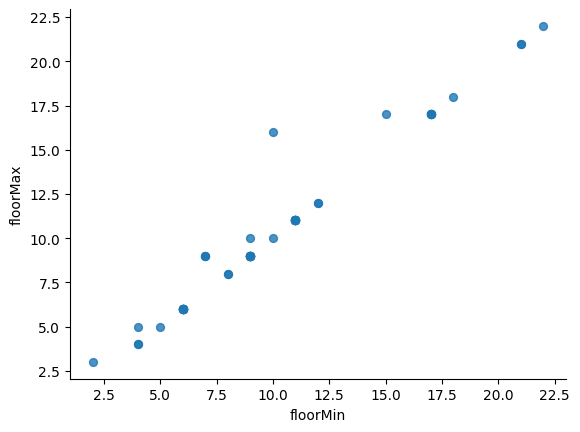

In [ ]:
from matplotlib import pyplot as plt
df_nashdomrf_32reg.plot(kind='scatter', x='floorMin', y='floorMax', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#выборка из 60 объектов
df_nashdomrf_32reg.shape

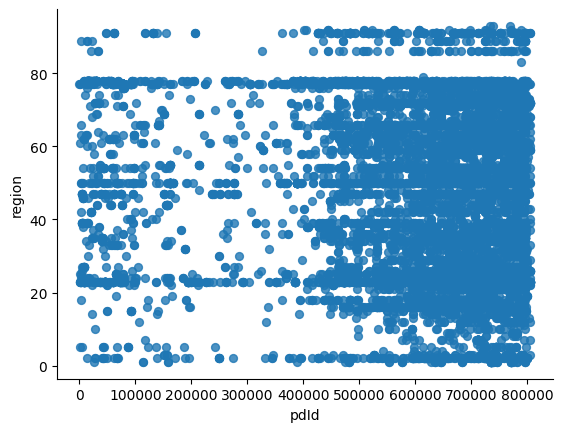

In [ ]:
from matplotlib import pyplot as plt
df_nashdomrf_new.plot(kind='scatter', x='pdId', y='region', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

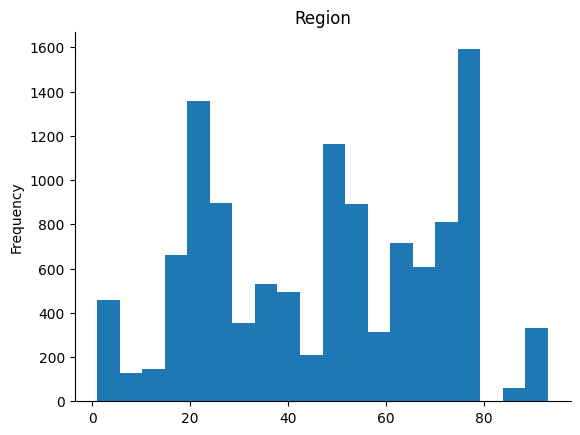

In [ ]:
from matplotlib import pyplot as plt
df_nashdomrf_new['region'].plot(kind='hist', bins=20, title='Region')
plt.gca().spines[['top', 'right',]].set_visible(False)